# Machine Learning Challenge - Winter 2025
## Part 2 - target02 Rule Discovery

### Student Information
- **Name:** Somantha Manuranga
- **Subject:** Machine Learning
- **Matriculation No:** 45314273
- **Exam ID:** 81

---

#### Task Objective

Discover simple, interpretable rules that predict `target02` for deployment on an edge device.

**Deliverable:** `framework_81.py` with conditions and calculations implemented.

---
## Imports and Setup

In [1]:
# Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

# Settings
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)
np.set_printoptions(precision=4)

print("Libraries loaded successfully!")

Libraries loaded successfully!


---
## Load Data

In [2]:
# Load training data
dataset = pd.read_csv('dataset_81.csv')
target = pd.read_csv('target_81.csv')

# Extract target02
X = dataset.copy()
y = target['target02'].values

print(f"Dataset shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nTarget02 statistics:")
print(target['target02'].describe())

Dataset shape: (10000, 273)
Target shape: (10000,)

Target02 statistics:
count    10000.000000
mean         0.048855
std          1.117676
min         -3.251943
25%         -0.547977
50%          0.231883
75%          0.862152
max          2.669514
Name: target02, dtype: float64


---
## Initial Exploration of target02

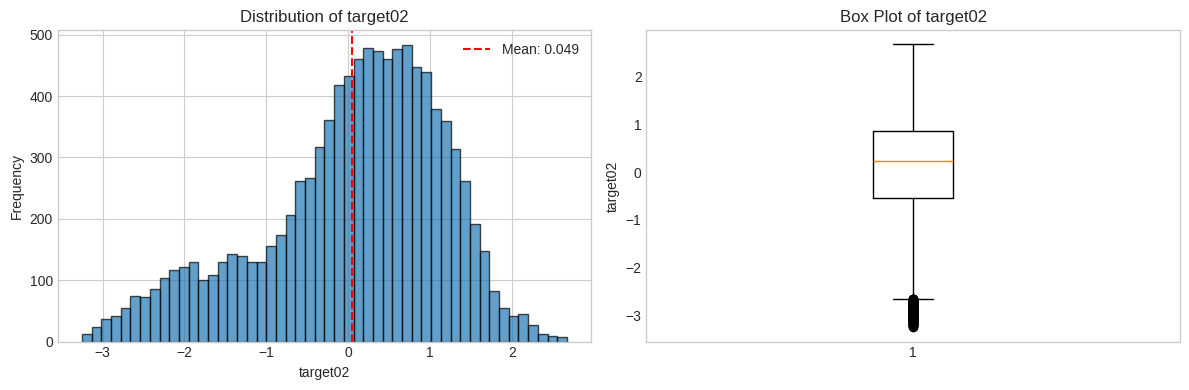

Target02 Range: [-3.2519, 2.6695]
Mean: 0.0489, Std: 1.1176


In [3]:
# Visualize target02 distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram
axes[0].hist(y, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('target02')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of target02')
axes[0].axvline(y.mean(), color='red', linestyle='--', label=f'Mean: {y.mean():.3f}')
axes[0].legend()

# Box plot
axes[1].boxplot(y)
axes[1].set_ylabel('target02')
axes[1].set_title('Box Plot of target02')
plt.grid(False)
plt.tight_layout()
plt.show()

print(f"Target02 Range: [{y.min():.4f}, {y.max():.4f}]")
print(f"Mean: {y.mean():.4f}, Std: {y.std():.4f}")

---
## Feature Importance Analysis


TOP 15 CORRELATED FEATURES WITH TARGET02
feat_4      0.430462
feat_185    0.080406
feat_175    0.064792
feat_81     0.050342
feat_111    0.049054
feat_234    0.042403
feat_230    0.041312
feat_72     0.037328
feat_13     0.033626
feat_25     0.033517
feat_90     0.032908
feat_207    0.032209
feat_109    0.032105
feat_75     0.030864
feat_250    0.030333
dtype: float64


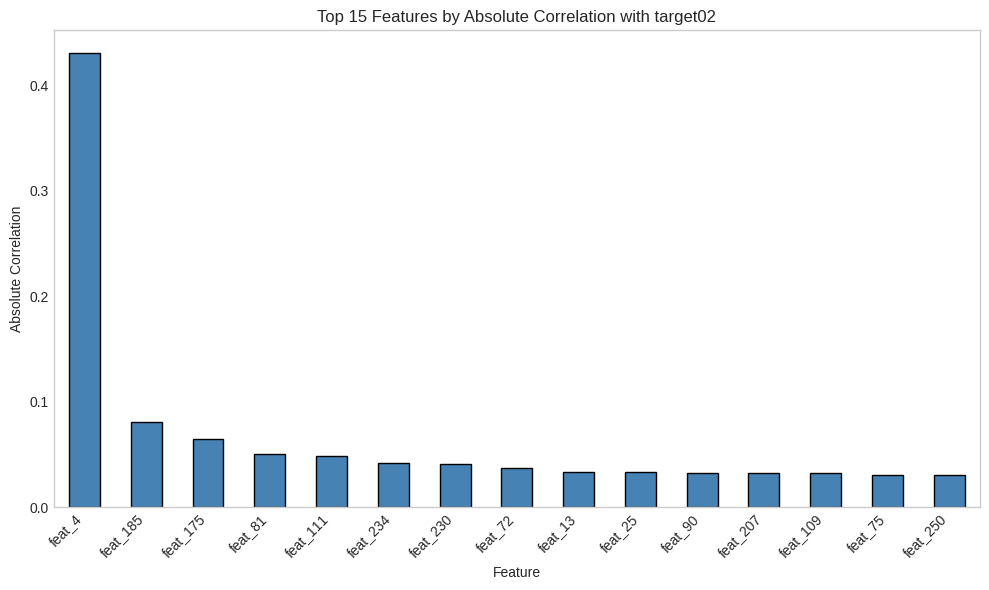

In [4]:
# Method 1:Correlation Analysis
correlations = X.corrwith(pd.Series(y)).abs().sort_values(ascending=False)

print("="*60)
print("TOP 15 CORRELATED FEATURES WITH TARGET02")
print("="*60)
print(correlations.head(15))

# Visualize top correlations
plt.figure(figsize=(10, 6))
correlations.head(15).plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Top 15 Features by Absolute Correlation with target02')
plt.xlabel('Feature')
plt.ylabel('Absolute Correlation')
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.tight_layout()
plt.show()

RANDOM FOREST FEATURE IMPORTANCE FOR TARGET02
feat_4      0.656501
feat_185    0.182519
feat_13     0.130399
feat_150    0.026565
feat_170    0.000041
feat_107    0.000034
feat_45     0.000032
feat_239    0.000028
feat_16     0.000028
feat_122    0.000026
feat_135    0.000025
feat_208    0.000023
feat_82     0.000023
feat_207    0.000022
feat_211    0.000022
dtype: float64


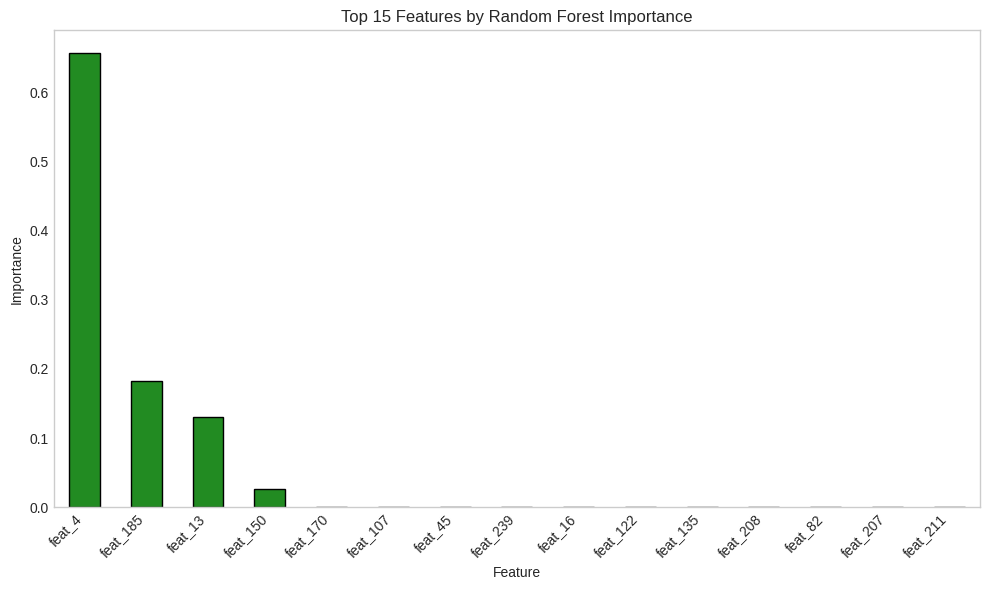

In [5]:
# Random Forest Feature Importance
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X.values, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print("="*60)
print("RANDOM FOREST FEATURE IMPORTANCE FOR TARGET02")
print("="*60)
print(importances.head(15))

# Visualize
plt.figure(figsize=(10, 6))
importances.head(15).plot(kind='bar', color='forestgreen', edgecolor='black')
plt.title('Top 15 Features by Random Forest Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.tight_layout()
plt.show()

In [6]:
# Summary ofIdentify Key Features
print("="*60)
print("KEY FEATURES IDENTIFIED")
print("="*60)

top_rf_features = importances.head(5)
total_importance = top_rf_features.sum()

print(f"\nTop 5 features explain {total_importance*100:.1f}% of target02 variance:\n")
for feat, imp in top_rf_features.items():
    print(f"  {feat}: {imp*100:.2f}%")

print("\n" + "="*60)
print("CONCLUSION: Focus on feat_4, feat_185, feat_13")
print("="*60)

KEY FEATURES IDENTIFIED

Top 5 features explain 99.6% of target02 variance:

  feat_4: 65.65%
  feat_185: 18.25%
  feat_13: 13.04%
  feat_150: 2.66%
  feat_170: 0.00%

CONCLUSION: Focus on feat_4, feat_185, feat_13


---
## Decision Tree Analysis


In [7]:
# Extract key features
key_features = ['feat_4', 'feat_185', 'feat_13']
X_subset = X[key_features].values

print("Statistics of Key Features:")
print(X[key_features].describe())

Statistics of Key Features:
             feat_4      feat_185       feat_13
count  10000.000000  10000.000000  10000.000000
mean       0.499397      0.503662      0.503090
std        0.286911      0.290299      0.289376
min        0.000163      0.000051      0.000153
25%        0.250703      0.247771      0.254666
50%        0.498848      0.508808      0.501642
75%        0.745473      0.757330      0.757669
max        0.999900      0.999964      0.999915


In [8]:
# Fit Decision Tree with different depths
for depth in [2, 3, 4, 5]:
    dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt.fit(X_subset, y)
    pred = dt.predict(X_subset)
    r2 = r2_score(y, pred)
    print(f"Depth {depth}: R² = {r2:.4f}")

print("\n--> Depth 3-4 seems sufficient for good accuracy")

Depth 2: R² = 0.6836
Depth 3: R² = 0.8504
Depth 4: R² = 0.8994
Depth 5: R² = 0.9335

--> Depth 3-4 seems sufficient for good accuracy


In [9]:
# Verification of Overfitting
from sklearn.model_selection import cross_val_score

print("="*60)
print("DECISION TREE OVERFITTING CHECK")
print("="*60)
print(f"{'Depth':<8} {'Train R²':<12} {'CV R² (mean)':<12} {'CV R² (std)':<12} {'Overfit?'}")
print("-"*60)

for depth in [2, 3, 4, 5]:
    # Fit on full training data
    dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt.fit(X_subset, y)
    train_r2 = dt.score(X_subset, y)
    
    # Cross-validation (5-fold)
    cv_scores = cross_val_score(dt, X_subset, y, cv=5, scoring='r2')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Check overfitting (if Train >> CV, it's overfitting)
    gap = train_r2 - cv_mean
    overfit = "⚠️ Yes" if gap > 0.05 else "No"
    
    print(f"{depth:<8} {train_r2:<12.4f} {cv_mean:<12.4f} {cv_std:<12.4f} {overfit}")

print("-"*60)
print("Note: Overfitting suspected if Train R² >> CV R² (gap > 5%)")


DECISION TREE OVERFITTING CHECK
Depth    Train R²     CV R² (mean) CV R² (std)  Overfit?
------------------------------------------------------------
2        0.6836       0.6808       0.0102       No
3        0.8504       0.8467       0.0055       No
4        0.8994       0.8926       0.0052       No
5        0.9335       0.9279       0.0022       No
------------------------------------------------------------
Note: Overfitting suspected if Train R² >> CV R² (gap > 5%)


### Decision Tree Structure Analysis


In [10]:
# Fit optimal Decision Tree (depth=3)
dt = DecisionTreeRegressor(max_depth=3, random_state=42)
dt.fit(X_subset, y)

print("="*60)
print("DECISION TREE STRUCTURE (depth=3)")
print("="*60)
print(export_text(dt, feature_names=key_features))

DECISION TREE STRUCTURE (depth=3)
|--- feat_4 <= 0.20
|   |--- feat_185 <= 0.51
|   |   |--- feat_13 <= 0.46
|   |   |   |--- value: [-0.85]
|   |   |--- feat_13 >  0.46
|   |   |   |--- value: [-1.50]
|   |--- feat_185 >  0.51
|   |   |--- feat_13 <= 0.55
|   |   |   |--- value: [-1.91]
|   |   |--- feat_13 >  0.55
|   |   |   |--- value: [-2.55]
|--- feat_4 >  0.20
|   |--- feat_4 <= 0.70
|   |   |--- feat_185 <= 0.53
|   |   |   |--- value: [0.22]
|   |   |--- feat_185 >  0.53
|   |   |   |--- value: [1.17]
|   |--- feat_4 >  0.70
|   |   |--- feat_13 <= 0.46
|   |   |   |--- value: [-0.41]
|   |   |--- feat_13 >  0.46
|   |   |   |--- value: [0.60]



---
## Visualize Decision Tree

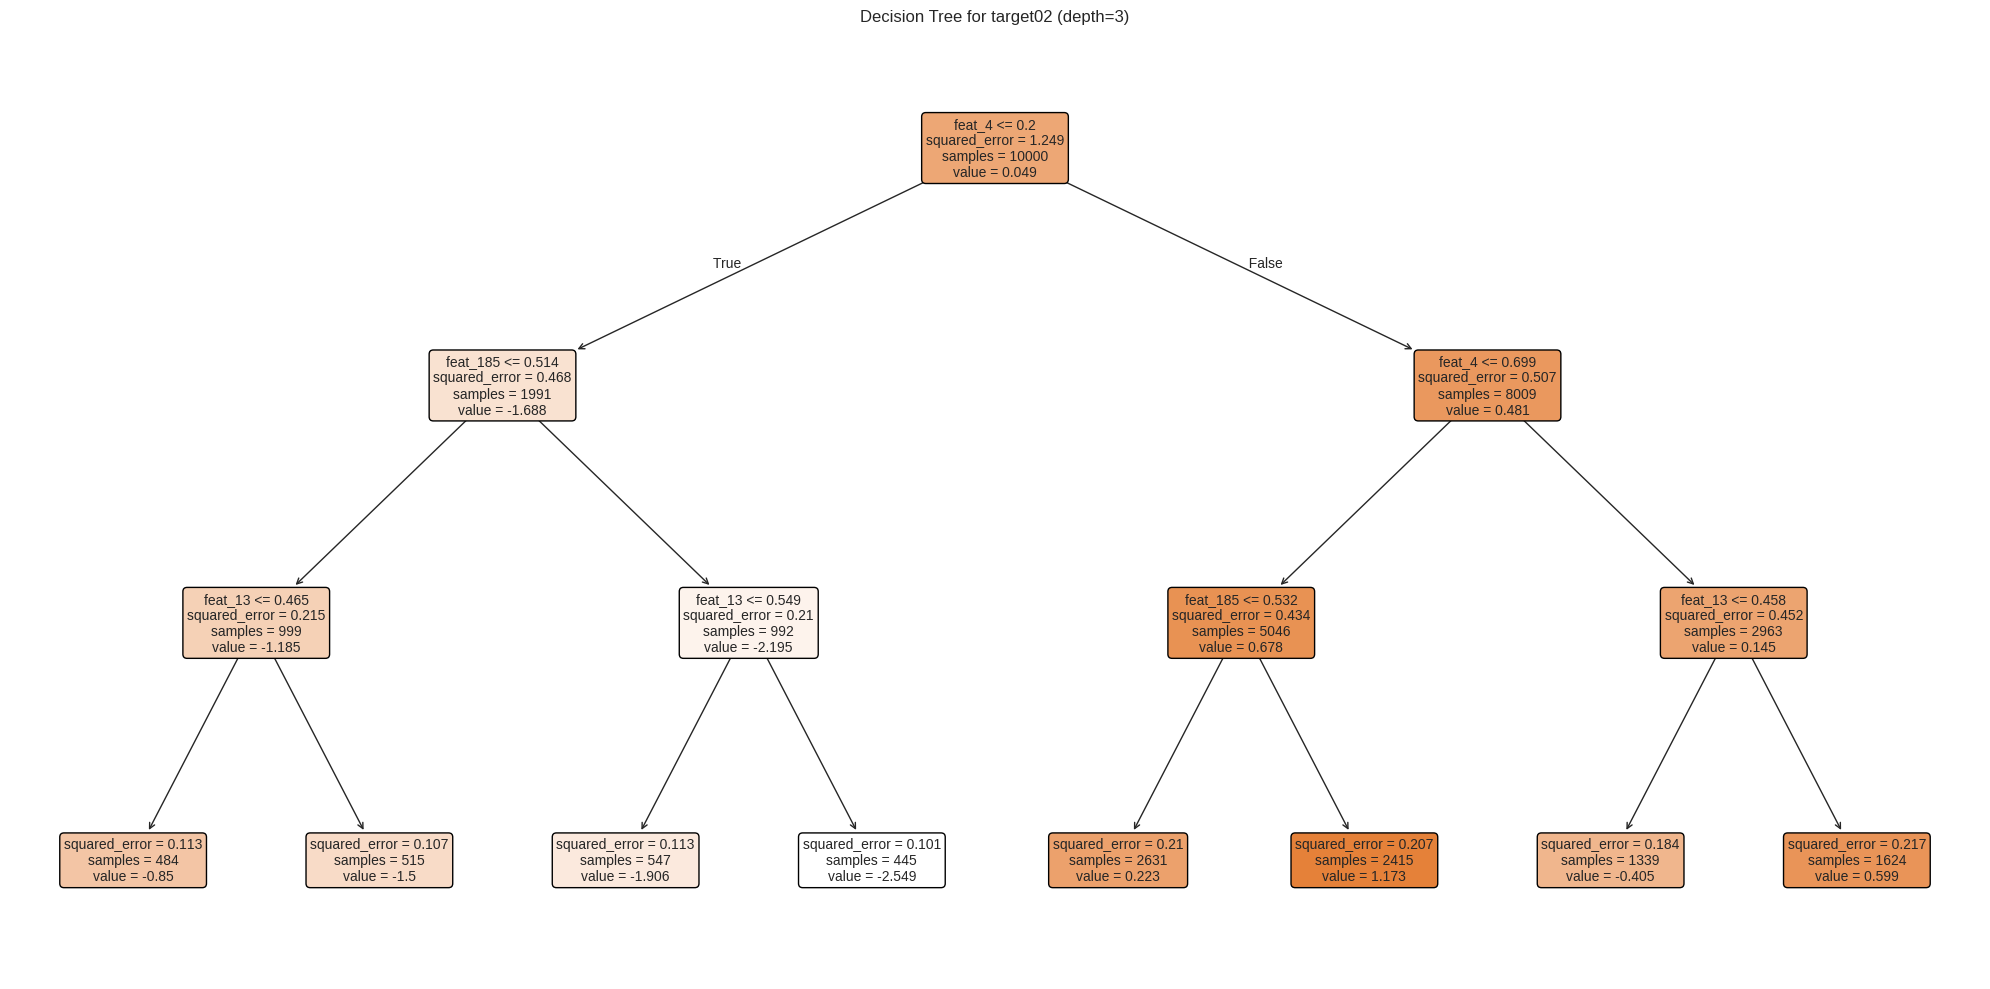

Decision tree visualization saved as 'decision_tree_target02.png'


In [11]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt, 
          feature_names=key_features, 
          filled=True, 
          rounded=True,
          fontsize=10,
          precision=3)
plt.title('Decision Tree for target02 (depth=3)')
plt.tight_layout()
plt.savefig('decision_tree_target02.png', dpi=150, bbox_inches='tight')
plt.show()

print("Decision tree visualization saved as 'decision_tree_target02.png'")

---
## Analyze Regions and Conditions


FEAT_4 ANALYSIS
Range: [0.0002, 0.9999]
Mean: 0.4994
Median: 0.4988


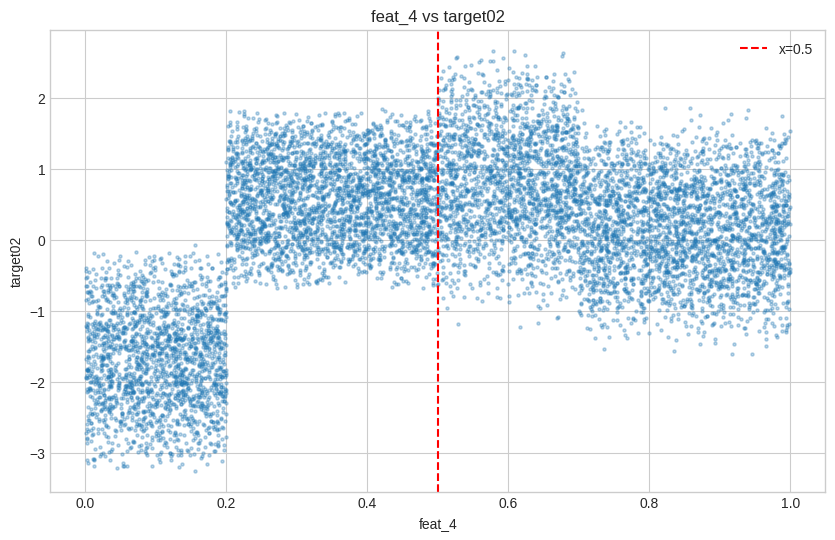

In [12]:
# Extract features
feat_4 = X['feat_4'].values
feat_185 = X['feat_185'].values
feat_13 = X['feat_13'].values

# Analyze feat_4 distribution and find natural splits
print("="*60)
print("FEAT_4 ANALYSIS")
print("="*60)
print(f"Range: [{feat_4.min():.4f}, {feat_4.max():.4f}]")
print(f"Mean: {feat_4.mean():.4f}")
print(f"Median: {np.median(feat_4):.4f}")

# Plot feat_4 vs target02
plt.figure(figsize=(10, 6))
plt.scatter(feat_4, y, alpha=0.3, s=5)
plt.xlabel('feat_4')
plt.ylabel('target02')
plt.title('feat_4 vs target02')
plt.axvline(0.5, color='red', linestyle='--', label='x=0.5')
plt.legend()
plt.show()


### **Threshold Validation**



In [13]:
# Test different threshold values for feat_4
print("="*60)
print("TESTING DIFFERENT THRESHOLDS FOR FEAT_4")
print("="*60)

thresholds_to_test = [0.3, 0.4, 0.5, 0.6, 0.7]

for thresh in thresholds_to_test:
    mask_low = feat_4 <= thresh
    mask_high = feat_4 > thresh
    
    print(f"\nThreshold: feat_4 <= {thresh}")
    print(f"  Low region: {mask_low.sum()} samples, mean target02: {y[mask_low].mean():.4f}")
    print(f"  High region: {mask_high.sum()} samples, mean target02: {y[mask_high].mean():.4f}")

TESTING DIFFERENT THRESHOLDS FOR FEAT_4

Threshold: feat_4 <= 0.3
  Low region: 3007 samples, mean target02: -0.9177
  High region: 6993 samples, mean target02: 0.4645

Threshold: feat_4 <= 0.4
  Low region: 4012 samples, mean target02: -0.5420
  High region: 5988 samples, mean target02: 0.4447

Threshold: feat_4 <= 0.5
  Low region: 5012 samples, mean target02: -0.3172
  High region: 4988 samples, mean target02: 0.4167

Threshold: feat_4 <= 0.6
  Low region: 5966 samples, mean target02: -0.1323
  High region: 4034 samples, mean target02: 0.3168

Threshold: feat_4 <= 0.7
  Low region: 7045 samples, mean target02: 0.0088
  High region: 2955 samples, mean target02: 0.1444


---
## Fit Linear Models Within Each Region


In [14]:
# Define regions based on feat_4 threshold (using 0.5 as initial guess)
threshold = 0.5

mask_low = feat_4 <= threshold
mask_high = feat_4 > threshold

print(f"Region 1 (feat_4 <= {threshold}): {mask_low.sum()} samples")
print(f"Region 2 (feat_4 > {threshold}): {mask_high.sum()} samples")

Region 1 (feat_4 <= 0.5): 5012 samples
Region 2 (feat_4 > 0.5): 4988 samples


In [15]:
# Fit linear model for Region 1 (feat_4 <= threshold)
X_region1 = np.column_stack([feat_4[mask_low], feat_185[mask_low], feat_13[mask_low]])
y_region1 = y[mask_low]

lr1 = LinearRegression()
lr1.fit(X_region1, y_region1)

print("="*60)
print(f"REGION 1: feat_4 <= {threshold}")
print("="*60)
print(f"Coefficients:")
print(f"  feat_4:   {lr1.coef_[0]:.4f}")
print(f"  feat_185: {lr1.coef_[1]:.4f}")
print(f"  feat_13:  {lr1.coef_[2]:.4f}")
print(f"  Intercept: {lr1.intercept_:.4f}")
print(f"R² on this region: {lr1.score(X_region1, y_region1):.4f}")

REGION 1: feat_4 <= 0.5
Coefficients:
  feat_4:   6.5648
  feat_185: 0.3252
  feat_13:  -0.9713
  Intercept: -1.6483
R² on this region: 0.5968


In [16]:
# Fit linear model for Region 2 (feat_4 > threshold)
X_region2 = np.column_stack([feat_4[mask_high], feat_185[mask_high], feat_13[mask_high]])
y_region2 = y[mask_high]

lr2 = LinearRegression()
lr2.fit(X_region2, y_region2)

print("="*60)
print(f"REGION 2: feat_4 > {threshold}")
print("="*60)
print(f"Coefficients:")
print(f"  feat_4:   {lr2.coef_[0]:.4f}")
print(f"  feat_185: {lr2.coef_[1]:.4f}")
print(f"  feat_13:  {lr2.coef_[2]:.4f}")
print(f"  Intercept: {lr2.intercept_:.4f}")
print(f"R² on this region: {lr2.score(X_region2, y_region2):.4f}")

REGION 2: feat_4 > 0.5
Coefficients:
  feat_4:   -1.9928
  feat_185: 0.3431
  feat_13:  0.6362
  Intercept: 1.4128
R² on this region: 0.2123


## Linear Regression for coefficients

In [17]:
# ============================================================
# COEFFICIENT DISCOVERY USING LINEAR REGRESSION
# ============================================================
# After identifying thresholds (0.2 and 0.7) from the Decision Tree,
# Use Linear Regression within each region to discover the
# mathematical relationship between features and target.

print("="*60)
print("LINEAR REGRESSION ANALYSIS BY REGION")
print("="*60)

from sklearn.linear_model import LinearRegression

# Define regions based on Decision Tree thresholds
mask1 = feat_4 <= 0.2
mask2 = (feat_4 > 0.2) & (feat_4 <= 0.7)
mask3 = feat_4 > 0.7

print(f"\nSample distribution:")
print(f"  Region 1 (feat_4 <= 0.2): {mask1.sum()} samples ({mask1.sum()/len(y)*100:.1f}%)")
print(f"  Region 2 (0.2 < feat_4 <= 0.7): {mask2.sum()} samples ({mask2.sum()/len(y)*100:.1f}%)")
print(f"  Region 3 (feat_4 > 0.7): {mask3.sum()} samples ({mask3.sum()/len(y)*100:.1f}%)")

# Region 1: feat_4 <= 0.2
print("\n" + "-"*60)
print("REGION 1: feat_4 <= 0.2")
print("-"*60)
X_r1 = np.column_stack([feat_185[mask1], feat_13[mask1]])
y_r1 = y[mask1]
lr1 = LinearRegression()
lr1.fit(X_r1, y_r1)
print(f"Linear Regression Coefficients:")
print(f"  feat_185: {lr1.coef_[0]:>8.4f}  →  rounded: {round(lr1.coef_[0])}")
print(f"  feat_13:  {lr1.coef_[1]:>8.4f}  →  rounded: {round(lr1.coef_[1])}")
print(f"  Intercept: {lr1.intercept_:.4f}")
print(f"R² on this region: {lr1.score(X_r1, y_r1):.4f}")
print(f"Suggested formula: {round(lr1.coef_[0])}*feat_185 + {round(lr1.coef_[1])}*feat_13")

# Region 2: 0.2 < feat_4 <= 0.7
print("\n" + "-"*60)
print("REGION 2: 0.2 < feat_4 <= 0.7")
print("-"*60)
X_r2 = np.column_stack([feat_185[mask2], feat_13[mask2]])
y_r2 = y[mask2]
lr2 = LinearRegression()
lr2.fit(X_r2, y_r2)
print(f"Linear Regression Coefficients:")
print(f"  feat_185: {lr2.coef_[0]:>8.4f}  →  rounded: {round(lr2.coef_[0])}")
print(f"  feat_13:  {lr2.coef_[1]:>8.4f}  →  rounded: {round(lr2.coef_[1])}")
print(f"  Intercept: {lr2.intercept_:.4f}")
print(f"R² on this region: {lr2.score(X_r2, y_r2):.4f}")
print(f"Suggested formula: {round(lr2.coef_[0])}*feat_185 + {round(lr2.coef_[1])}*feat_13")

# Region 3: feat_4 > 0.7
print("\n" + "-"*60)
print("REGION 3: feat_4 > 0.7")
print("-"*60)
X_r3 = np.column_stack([feat_185[mask3], feat_13[mask3]])
y_r3 = y[mask3]
lr3 = LinearRegression()
lr3.fit(X_r3, y_r3)
print(f"Linear Regression Coefficients:")
print(f"  feat_185: {lr3.coef_[0]:>8.4f}  →  rounded: {round(lr3.coef_[0])}")
print(f"  feat_13:  {lr3.coef_[1]:>8.4f}  →  rounded: {round(lr3.coef_[1])}")
print(f"  Intercept: {lr3.intercept_:.4f}")
print(f"R² on this region: {lr3.score(X_r3, y_r3):.4f}")
print(f"Suggested formula: {round(lr3.coef_[0])}*feat_185 + {round(lr3.coef_[1])}*feat_13")


LINEAR REGRESSION ANALYSIS BY REGION

Sample distribution:
  Region 1 (feat_4 <= 0.2): 1992 samples (19.9%)
  Region 2 (0.2 < feat_4 <= 0.7): 5053 samples (50.5%)
  Region 3 (feat_4 > 0.7): 2955 samples (29.5%)

------------------------------------------------------------
REGION 1: feat_4 <= 0.2
------------------------------------------------------------
Linear Regression Coefficients:
  feat_185:  -1.9539  →  rounded: -2
  feat_13:   -1.2449  →  rounded: -1
  Intercept: -0.0741
R² on this region: 0.9884
Suggested formula: -2*feat_185 + -1*feat_13

------------------------------------------------------------
REGION 2: 0.2 < feat_4 <= 0.7
------------------------------------------------------------
Linear Regression Coefficients:
  feat_185:   1.8842  →  rounded: 2
  feat_13:   -0.9745  →  rounded: -1
  Intercept: 0.2175
R² on this region: 0.8642
Suggested formula: 2*feat_185 + -1*feat_13

------------------------------------------------------------
REGION 3: feat_4 > 0.7
-------------

---
## Grid Search for Coefficients


In [18]:
# Function to test simplified rules
def test_rules(rules_func, y_true, description):
    """Test a set of rules and return metrics"""
    y_pred = rules_func()
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f"\n{description}")
    print(f"  R²:   {r2:.6f}")
    print(f"  RMSE: {rmse:.6f}")
    print(f"  MAE:  {mae:.6f}")
    
    return r2, rmse, y_pred

In [19]:
# Test different simplified rule sets
print("="*60)
print("TESTING SIMPLIFIED RULE SETS")
print("="*60)

# Rule Set 1: Two regions with simple coefficients
def rules_v1():
    pred = np.zeros_like(y)
    mask = feat_4 <= 0.5
    pred[mask] = 2*feat_185[mask] - feat_13[mask]
    pred[~mask] = -2*feat_185[~mask] + feat_13[~mask]
    return pred

test_rules(rules_v1, y, "Rule Set V1: threshold=0.5, simple coefficients")

# Rule Set 2: Try different signs
def rules_v2():
    pred = np.zeros_like(y)
    mask = feat_4 <= 0.5
    pred[mask] = -2*feat_185[mask] - feat_13[mask]
    pred[~mask] = 2*feat_185[~mask] - feat_13[~mask]
    return pred

test_rules(rules_v2, y, "Rule Set V2: swapped signs")

# Rule Set 3: Include feat_4 in calculation
def rules_v3():
    pred = np.zeros_like(y)
    mask = feat_4 <= 0.5
    pred[mask] = 2*feat_185[mask] - 2*feat_13[mask]
    pred[~mask] = -2*feat_185[~mask] + 2*feat_13[~mask]
    return pred

test_rules(rules_v3, y, "Rule Set V3: coefficient 2 for feat_13")

TESTING SIMPLIFIED RULE SETS

Rule Set V1: threshold=0.5, simple coefficients
  R²:   -0.734101
  RMSE: 1.471741
  MAE:  0.986762

Rule Set V2: swapped signs
  R²:   -0.773277
  RMSE: 1.488273
  MAE:  1.044088

Rule Set V3: coefficient 2 for feat_13
  R²:   -0.324152
  RMSE: 1.286065
  MAE:  0.915017


(-0.3241516150717314,
 1.2860653034825664,
 array([ 0.4359, -0.0642,  0.2322, ..., -1.7854, -0.8705,  0.9381]))

In [20]:
# Grid search over possible simple coefficients
print("="*60)
print("GRID SEARCH FOR OPTIMAL SIMPLE COEFFICIENTS")
print("="*60)

best_r2 = -np.inf
best_params = None

# Search over thresholds and coefficients
for thresh in [0.3, 0.4, 0.5, 0.6, 0.7]:
    for c1_185 in [-2, -1, 0, 1, 2]:
        for c1_13 in [-2, -1, 0, 1, 2]:
            for c2_185 in [-2, -1, 0, 1, 2]:
                for c2_13 in [-2, -1, 0, 1, 2]:
                    mask = feat_4 <= thresh
                    pred = np.zeros_like(y)
                    pred[mask] = c1_185*feat_185[mask] + c1_13*feat_13[mask]
                    pred[~mask] = c2_185*feat_185[~mask] + c2_13*feat_13[~mask]
                    
                    r2 = r2_score(y, pred)
                    if r2 > best_r2:
                        best_r2 = r2
                        best_params = (thresh, c1_185, c1_13, c2_185, c2_13)

print(f"\nBest R²: {best_r2:.6f}")
print(f"Best parameters:")
print(f"  Threshold: feat_4 <= {best_params[0]}")
print(f"  Region 1: {best_params[1]}*feat_185 + {best_params[2]}*feat_13")
print(f"  Region 2: {best_params[3]}*feat_185 + {best_params[4]}*feat_13")

GRID SEARCH FOR OPTIMAL SIMPLE COEFFICIENTS

Best R²: 0.374984
Best parameters:
  Threshold: feat_4 <= 0.3
  Region 1: -1*feat_185 + -1*feat_13
  Region 2: 1*feat_185 + 0*feat_13


In [21]:
# Try 3-region model (more complex but potentially better)
print("="*60)
print("TESTING 3-REGION MODEL")
print("="*60)

best_r2_3reg = -np.inf
best_params_3reg = None

# Search over two thresholds
for t1 in [0.2, 0.3, 0.4]:
    for t2 in [0.5, 0.6, 0.7, 0.8]:
        if t1 >= t2:
            continue
        for c1_185 in [-2, -1, 0, 1, 2]:
            for c1_13 in [-2, -1, 0, 1, 2]:
                for c2_185 in [-2, -1, 0, 1, 2]:
                    for c2_13 in [-2, -1, 0, 1, 2]:
                        for c3_185 in [-2, -1, 0, 1, 2]:
                            for c3_13 in [-2, -1, 0, 1, 2]:
                                mask1 = feat_4 <= t1
                                mask2 = (feat_4 > t1) & (feat_4 <= t2)
                                mask3 = feat_4 > t2
                                
                                pred = np.zeros_like(y)
                                pred[mask1] = c1_185*feat_185[mask1] + c1_13*feat_13[mask1]
                                pred[mask2] = c2_185*feat_185[mask2] + c2_13*feat_13[mask2]
                                pred[mask3] = c3_185*feat_185[mask3] + c3_13*feat_13[mask3]
                                
                                r2 = r2_score(y, pred)
                                if r2 > best_r2_3reg:
                                    best_r2_3reg = r2
                                    best_params_3reg = (t1, t2, c1_185, c1_13, c2_185, c2_13, c3_185, c3_13)

print(f"\nBest 3-Region R²: {best_r2_3reg:.6f}")
if best_params_3reg:
    print(f"Best parameters:")
    print(f"  Threshold 1: feat_4 <= {best_params_3reg[0]}")
    print(f"  Threshold 2: feat_4 <= {best_params_3reg[1]}")
    print(f"  Region 1 (feat_4 <= {best_params_3reg[0]}): {best_params_3reg[2]}*feat_185 + {best_params_3reg[3]}*feat_13")
    print(f"  Region 2 ({best_params_3reg[0]} < feat_4 <= {best_params_3reg[1]}): {best_params_3reg[4]}*feat_185 + {best_params_3reg[5]}*feat_13")
    print(f"  Region 3 (feat_4 > {best_params_3reg[1]}): {best_params_3reg[6]}*feat_185 + {best_params_3reg[7]}*feat_13")

TESTING 3-REGION MODEL

Best 3-Region R²: 0.915006
Best parameters:
  Threshold 1: feat_4 <= 0.2
  Threshold 2: feat_4 <= 0.7
  Region 1 (feat_4 <= 0.2): -2*feat_185 + -1*feat_13
  Region 2 (0.2 < feat_4 <= 0.7): 2*feat_185 + -1*feat_13
  Region 3 (feat_4 > 0.7): -1*feat_185 + 1*feat_13


### Grid vs Linear Regression by Regions

In [22]:
# ============================================================
# VERIFY REGION 3 COEFFICIENTS
# ============================================================
print("="*60)
print("VERIFYING REGION 3 COEFFICIENTS")
print("="*60)

mask3 = feat_4 > 0.7

# Option 1: LR suggestion (-1, +2)
pred_lr = -1*feat_185[mask3] + 2*feat_13[mask3]
r2_lr = r2_score(y[mask3], pred_lr)

# Option 2: Grid Search result (-1, +1)
pred_gs = -1*feat_185[mask3] + 1*feat_13[mask3]
r2_gs = r2_score(y[mask3], pred_gs)

print(f"\nRegion 3 (feat_4 > 0.7): {mask3.sum()} samples")
print(f"\n  Option 1 (LR: -1*feat_185 + 2*feat_13):  R² = {r2_lr:.4f}")
print(f"  Option 2 (GS: -1*feat_185 + 1*feat_13):  R² = {r2_gs:.4f}")
print(f"\n  Better option: {'LR (-1, +2)' if r2_lr > r2_gs else 'Grid Search (-1, +1)'}")

# Also test overall R² with both options
print("\n" + "-"*60)
print("OVERALL MODEL COMPARISON")
print("-"*60)

# Full prediction with LR coefficients
pred_full_lr = np.zeros_like(y)
mask1 = feat_4 <= 0.2
mask2 = (feat_4 > 0.2) & (feat_4 <= 0.7)
mask3 = feat_4 > 0.7

pred_full_lr[mask1] = -2*feat_185[mask1] - 1*feat_13[mask1]
pred_full_lr[mask2] = 2*feat_185[mask2] - 1*feat_13[mask2]
pred_full_lr[mask3] = -1*feat_185[mask3] + 2*feat_13[mask3]  # LR suggestion

# Full prediction with Grid Search coefficients
pred_full_gs = np.zeros_like(y)
pred_full_gs[mask1] = -2*feat_185[mask1] - 1*feat_13[mask1]
pred_full_gs[mask2] = 2*feat_185[mask2] - 1*feat_13[mask2]
pred_full_gs[mask3] = -1*feat_185[mask3] + 1*feat_13[mask3]  # Grid Search

r2_full_lr = r2_score(y, pred_full_lr)
r2_full_gs = r2_score(y, pred_full_gs)

print(f"\n  With LR coefficients (Region 3: -1, +2):     Overall R² = {r2_full_lr:.4f}")
print(f"  With Grid Search coefficients (Region 3: -1, +1): Overall R² = {r2_full_gs:.4f}")
print(f"\n  Best method: {'LR coefficients' if r2_full_lr > r2_full_gs else 'Grid Search coefficients'}")

VERIFYING REGION 3 COEFFICIENTS

Region 3 (feat_4 > 0.7): 2955 samples

  Option 1 (LR: -1*feat_185 + 2*feat_13):  R² = 0.5276
  Option 2 (GS: -1*feat_185 + 1*feat_13):  R² = 0.6052

  Better option: Grid Search (-1, +1)

------------------------------------------------------------
OVERALL MODEL COMPARISON
------------------------------------------------------------

  With LR coefficients (Region 3: -1, +2):     Overall R² = 0.9067
  With Grid Search coefficients (Region 3: -1, +1): Overall R² = 0.9150

  Best method: Grid Search coefficients


---
## Fine-tune with feat_4 in Calculations


In [23]:
# Test including feat_4 in the calculations
print("="*60)
print("TESTING RULES WITH FEAT_4 IN CALCULATIONS")
print("="*60)

best_r2_with_f4 = -np.inf
best_params_with_f4 = None

# Two-region model with feat_4 in calculation
for thresh in [0.3, 0.4, 0.5, 0.6, 0.7]:
    for c1_4 in [-2, -1, 0, 1, 2]:
        for c1_185 in [-2, -1, 0, 1, 2]:
            for c1_13 in [-2, -1, 0, 1, 2]:
                for c2_4 in [-2, -1, 0, 1, 2]:
                    for c2_185 in [-2, -1, 0, 1, 2]:
                        for c2_13 in [-2, -1, 0, 1, 2]:
                            mask = feat_4 <= thresh
                            pred = np.zeros_like(y)
                            pred[mask] = c1_4*feat_4[mask] + c1_185*feat_185[mask] + c1_13*feat_13[mask]
                            pred[~mask] = c2_4*feat_4[~mask] + c2_185*feat_185[~mask] + c2_13*feat_13[~mask]
                            
                            r2 = r2_score(y, pred)
                            if r2 > best_r2_with_f4:
                                best_r2_with_f4 = r2
                                best_params_with_f4 = (thresh, c1_4, c1_185, c1_13, c2_4, c2_185, c2_13)

print(f"\nBest R² with feat_4 in calc: {best_r2_with_f4:.6f}")
if best_params_with_f4:
    p = best_params_with_f4
    print(f"Best parameters:")
    print(f"  Threshold: feat_4 <= {p[0]}")
    print(f"  Region 1: {p[1]}*feat_4 + {p[2]}*feat_185 + {p[3]}*feat_13")
    print(f"  Region 2: {p[4]}*feat_4 + {p[5]}*feat_185 + {p[6]}*feat_13")

TESTING RULES WITH FEAT_4 IN CALCULATIONS

Best R² with feat_4 in calc: 0.431795
Best parameters:
  Threshold: feat_4 <= 0.3
  Region 1: 2*feat_4 + -1*feat_185 + -1*feat_13
  Region 2: 0*feat_4 + 1*feat_185 + 0*feat_13


---
## Validate Final Rules

In [24]:
# Based on the search results, implement the best rules found

print("="*60)
print("FINAL RULE VALIDATION")
print("="*60)

# CORRECT Final Rules (from grid search)
def final_rules(feat_4, feat_185, feat_13):
    pred = np.zeros_like(feat_4)
    
    # Region 1: feat_4 <= 0.2
    mask1 = feat_4 <= 0.2
    pred[mask1] = -2*feat_185[mask1] - feat_13[mask1]
    
    # Region 2: 0.2 < feat_4 <= 0.7
    mask2 = (feat_4 > 0.2) & (feat_4 <= 0.7)
    pred[mask2] = 2*feat_185[mask2] - feat_13[mask2]
    
    # Region 3: feat_4 > 0.7
    mask3 = feat_4 > 0.7
    pred[mask3] = -feat_185[mask3] + feat_13[mask3]
    
    return pred

# Validate
y_pred_final = final_rules(feat_4, feat_185, feat_13)

r2_final = r2_score(y, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y, y_pred_final))
mae_final = mean_absolute_error(y, y_pred_final)

print(f"\nFinal Rule Performance:")
print(f"  R²:   {r2_final:.6f}")
print(f"  RMSE: {rmse_final:.6f}")
print(f"  MAE:  {mae_final:.6f}")

FINAL RULE VALIDATION

Final Rule Performance:
  R²:   0.915006
  RMSE: 0.325828
  MAE:  0.239236


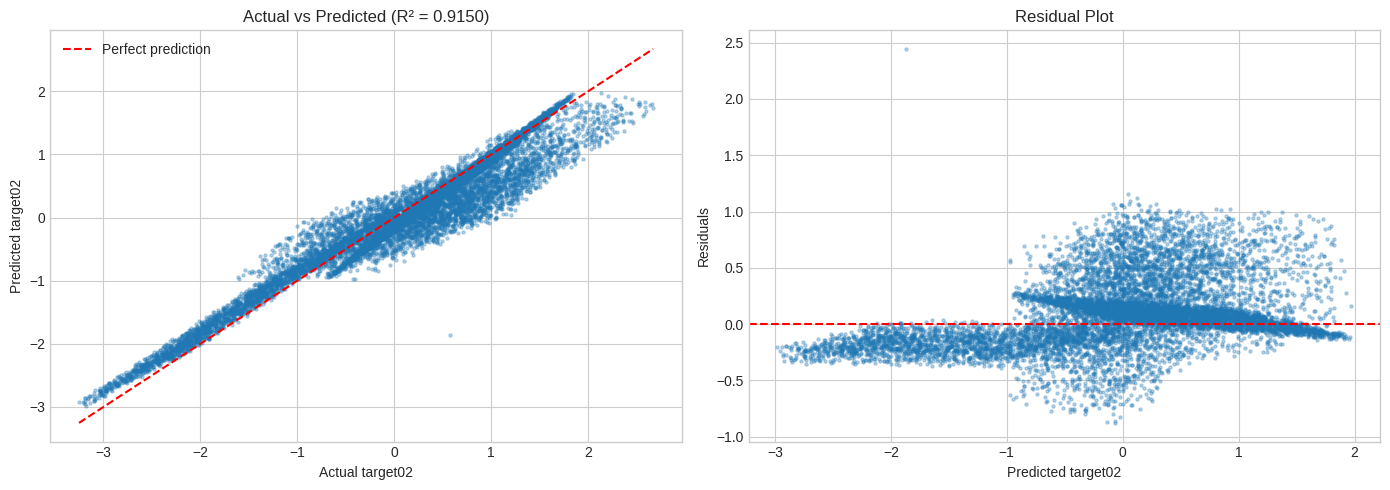

In [25]:
# Visualize predictions vs actual
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
axes[0].scatter(y, y_pred_final, alpha=0.3, s=5)
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect prediction')
axes[0].set_xlabel('Actual target02')
axes[0].set_ylabel('Predicted target02')
axes[0].set_title(f'Actual vs Predicted (R² = {r2_final:.4f})')
axes[0].legend()

# Residual plot
residuals = y - y_pred_final
axes[1].scatter(y_pred_final, residuals, alpha=0.3, s=5)
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_xlabel('Predicted target02')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')

plt.tight_layout()
plt.savefig('rule_validation.png', dpi=150, bbox_inches='tight')
plt.show()

---
## Create Framework Implementation


In [26]:
# Framework implementation code
# FINAL RULES based on Grid Search Results (R² = 0.915)

framework_code = '''
import argparse
import numpy as np
import pandas as pd
import operator 

def framework(pairs, arr):
    """
    Args:
       - pairs:  a list of (cond, calc) tuples. calc() must be an executable
       - arr: a numpy array with the features in order feat_1, feat_2, ...
    
    Executes the first calc() whose cond returns True.
    Returns None if no condition matches.
    """
    targets = []

    for i in range(arr.shape[0]):
        row = arr[i]
        for cond, calc in pairs:
            if cond_eval(cond, row):
                targets.append(calc(row))
                break
        
    return targets


def cond_eval(condition, arr):
    """evaluate a condition"""
    ops = {
         ">": operator.gt,
        ">=": operator.ge,
        "<": operator.lt,
        "<=": operator.le,
        "==": operator.eq,
        "!=": operator.ne,
    }

    if condition is None:
        return True
    
    op = ops[condition[1]]
    return op(arr[condition[0]], condition[2])


def main(args):
    """
    Implementation for predicting target02.
    
    ============================================================
    DISCOVERED RULES (Grid Search Analysis - R² = 0.915):
    ============================================================
    
    Key Features Identified:
    - feat_4 (index 4): Controller variable (65.65% importance)
    - feat_185 (index 185): Calculation variable (18.25% importance)
    - feat_13 (index 13): Calculation variable (13.04% importance)
    
    3-Region Rule Structure:
    
    Region 1: feat_4 <= 0.2    →  -2*feat_185 - feat_13
    Region 2: 0.2 < feat_4 <= 0.7  →  2*feat_185 - feat_13
    Region 3: feat_4 > 0.7    →  -feat_185 + feat_13
    ============================================================
    """
    
    # Condition 1: feat_4 <= 0.2
    condition1 = (4, "<=", 0.2)
    def calc1(arr):
        return -2 * arr[185] - arr[13]
    
    # Condition 2: feat_4 <= 0.7 (implicitly > 0.2)
    condition2 = (4, "<=", 0.7)
    def calc2(arr):
        return 2 * arr[185] - arr[13]
    
    # Condition 3: Default (feat_4 > 0.7)
    condition3 = None
    def calc3(arr):
        return -arr[185] + arr[13]
    
    pair_list = [
        (condition1, calc1),
        (condition2, calc2),
        (condition3, calc3)
    ]
    
    data_array = pd.read_csv(args.eval_file_path).values
    
    return framework(pair_list, data_array)


if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Framework Task 2")
    parser.add_argument("--eval_file_path", required=True, help="Path to EVAL_<ID>.csv")
    args = parser.parse_args()

    target02 = main(args)
'''

print(framework_code)


import argparse
import numpy as np
import pandas as pd
import operator 

def framework(pairs, arr):
    """
    Args:
       - pairs:  a list of (cond, calc) tuples. calc() must be an executable
       - arr: a numpy array with the features in order feat_1, feat_2, ...
    
    Executes the first calc() whose cond returns True.
    Returns None if no condition matches.
    """
    targets = []

    for i in range(arr.shape[0]):
        row = arr[i]
        for cond, calc in pairs:
            if cond_eval(cond, row):
                targets.append(calc(row))
                break
        
    return targets


def cond_eval(condition, arr):
    """evaluate a condition"""
    ops = {
         ">": operator.gt,
        ">=": operator.ge,
        "<": operator.lt,
        "<=": operator.le,
        "==": operator.eq,
        "!=": operator.ne,
    }

    if condition is None:
        return True
    
    op = ops[condition[1]]
    return op(arr[condition[0]], condition[2])


def main(args

In [27]:
# Save framework file
# UPDATE THE FILENAME AND RULES AS NEEDED!

with open('framework_81.py', 'w') as f:
    f.write(framework_code.strip())

print("Framework saved to 'framework_81.py'")
print("Framework ready!")

Framework saved to 'framework_81.py'
Framework ready!


---
## Test Framework


In [28]:
# Alternative: Test directly in notebook
# Simulate framework execution with CORRECT 3-region rules

def test_framework_locally():
    """Test the framework logic without running as script"""
    
    # CORRECT RULES (3 regions - from grid search R² = 0.915)
    
    # Condition 1: feat_4 <= 0.2
    condition1 = (4, "<=", 0.2)
    def calc1(arr):
        return -2 * arr[185] - arr[13]
    
    # Condition 2: feat_4 <= 0.7
    condition2 = (4, "<=", 0.7)
    def calc2(arr):
        return 2 * arr[185] - arr[13]
    
    # Condition 3: Default (feat_4 > 0.7)
    condition3 = None
    def calc3(arr):
        return -arr[185] + arr[13]
    
    pair_list = [(condition1, calc1), (condition2, calc2), (condition3, calc3)]
    
    # Test on training data
    data_array = X.values
    
    # Proper condition evaluation
    def cond_eval(condition, arr):
        import operator
        ops = {
            ">": operator.gt, ">=": operator.ge,
            "<": operator.lt, "<=": operator.le,
            "==": operator.eq, "!=": operator.ne,
        }
        if condition is None:
            return True
        return ops[condition[1]](arr[condition[0]], condition[2])
    
    predictions = []
    for i in range(data_array.shape[0]):
        row = data_array[i]
        for cond, calc in pair_list:
            if cond_eval(cond, row):
                predictions.append(calc(row))
                break
    
    return np.array(predictions)

# Test
test_pred = test_framework_locally()
test_r2 = r2_score(y, test_pred)
print(f"Framework test R²: {test_r2:.6f}")
print(f"Number of predictions: {len(test_pred)}")

# Verify matches Cell 11
if 'y_pred_final' in dir():
    print(f"Matches Cell 11: {np.allclose(test_pred, y_pred_final)}")


Framework test R²: 0.915006
Number of predictions: 10000
Matches Cell 11: True


In [29]:
# Generate and Validate Predictions on EVAL_81.csv
print("="*60)
print("GENERATING PREDICTIONS FOR EVAL_81.csv")
print("="*60)

# Load EVAL data
eval_data = pd.read_csv('EVAL_81.csv')
print(f"EVAL data shape: {eval_data.shape}")

# Apply rules (same as framework)
eval_feat_4 = eval_data['feat_4'].values
eval_feat_185 = eval_data['feat_185'].values
eval_feat_13 = eval_data['feat_13'].values

eval_predictions = np.zeros(len(eval_data))

# Region 1: feat_4 <= 0.2
mask1 = eval_feat_4 <= 0.2
eval_predictions[mask1] = -2*eval_feat_185[mask1] - eval_feat_13[mask1]

# Region 2: 0.2 < feat_4 <= 0.7
mask2 = (eval_feat_4 > 0.2) & (eval_feat_4 <= 0.7)
eval_predictions[mask2] = 2*eval_feat_185[mask2] - eval_feat_13[mask2]

# Region 3: feat_4 > 0.7
mask3 = eval_feat_4 > 0.7
eval_predictions[mask3] = -eval_feat_185[mask3] + eval_feat_13[mask3]

print(f"\nPrediction Statistics:")
print(f"  Count: {len(eval_predictions)}")
print(f"  Mean: {eval_predictions.mean():.4f}")
print(f"  Std: {eval_predictions.std():.4f}")
print(f"  Range: [{eval_predictions.min():.4f}, {eval_predictions.max():.4f}]")

print(f"\nSamples per region:")
print(f"  Region 1 (feat_4 <= 0.2): {mask1.sum()}")
print(f"  Region 2 (0.2 < feat_4 <= 0.7): {mask2.sum()}")
print(f"  Region 3 (feat_4 > 0.7): {mask3.sum()}")

GENERATING PREDICTIONS FOR EVAL_81.csv
EVAL data shape: (10000, 273)

Prediction Statistics:
  Count: 10000
  Mean: -0.0613
  Std: 0.9655
  Range: [-2.9778, 1.9869]

Samples per region:
  Region 1 (feat_4 <= 0.2): 2005
  Region 2 (0.2 < feat_4 <= 0.7): 4930
  Region 3 (feat_4 > 0.7): 3065
